In [20]:
import numpy as np
import pywt
import pandas as pd
from matplotlib import pyplot as plt

In [21]:
linspace = np.linspace(0, 4, 4000)
signal = np.sin(linspace * 2 * np.pi * np.linspace(5, 20, 4000))
signal1 = np.sin(2 * np.pi * 10 * linspace[0:1000])
signal2 = np.sin(2 * np.pi * 5  * linspace[1000:2000])
signal3 = np.sin(2 * np.pi * 20 * linspace[2000:])
# arr = signal# + np.random.normal(0, 3, 4000)# np.random.randn(4000)
arr = np.concatenate([signal1, signal2, signal3])

<Axes: >

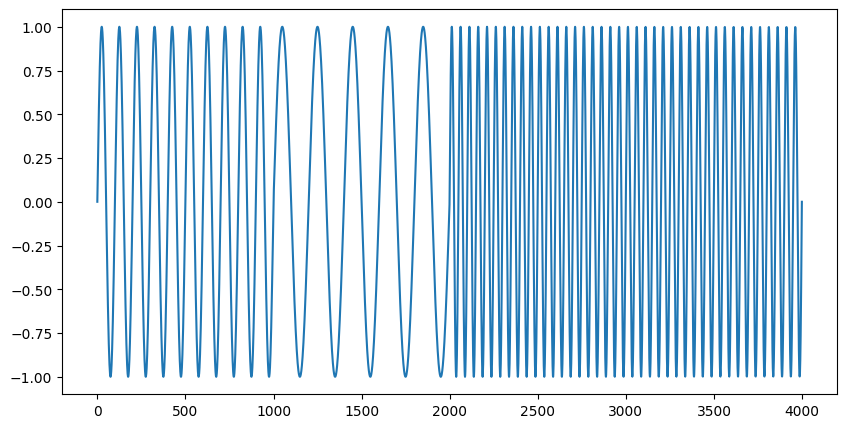

In [22]:
pd.Series(arr).plot(figsize=(10, 5))

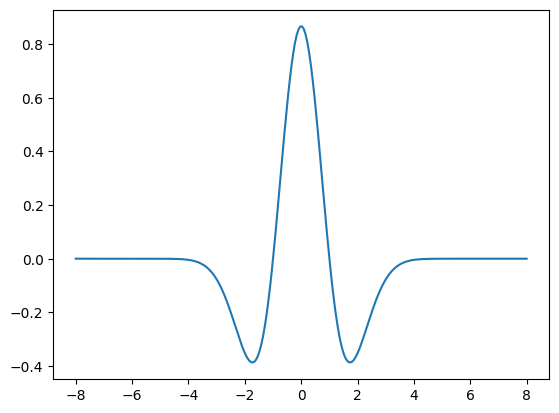

In [23]:
wavelet = "mexh"

[psi, x] = pywt.ContinuousWavelet (wavelet).wavefun()
import pylab
pylab.plot(x, psi)
pylab.show()

In [24]:
print(pywt.wavelist(kind='continuous'))


['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


In [25]:
scales = np.geomspace(1, 128, num=200)
sampling_period  = 0.001

In [26]:
cwtmatr, freqs = pywt.cwt(data=arr, scales=scales, wavelet=wavelet, sampling_period=sampling_period)
cwtmatr = np.abs(cwtmatr[:-1, :-1])


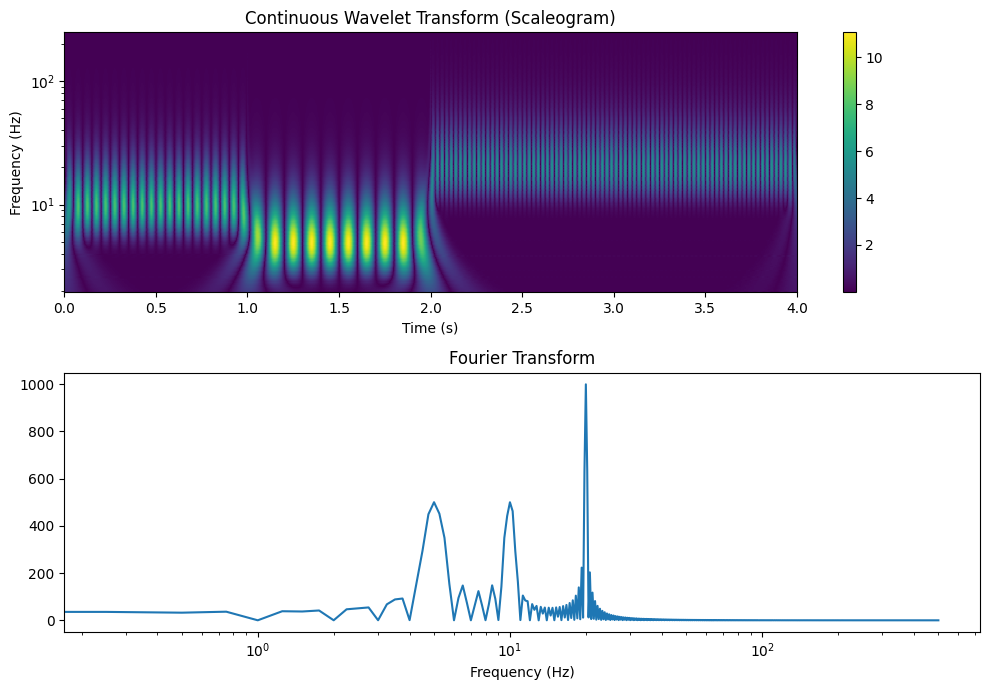

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
pcm = axs[0].pcolormesh(linspace, freqs, cwtmatr)
axs[0].set_yscale("log")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Frequency (Hz)")
axs[0].set_title("Continuous Wavelet Transform (Scaleogram)")
fig.colorbar(pcm, ax=axs[0])

from numpy.fft import rfft, rfftfreq

yf = rfft(arr)
xf = rfftfreq(len(arr), sampling_period)
# axs[1].set_ylim(0, 1000)
axs[1].set_xscale('log')

plt.plot(xf, np.abs(yf))
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_title("Fourier Transform")
plt.tight_layout()

<Axes: >

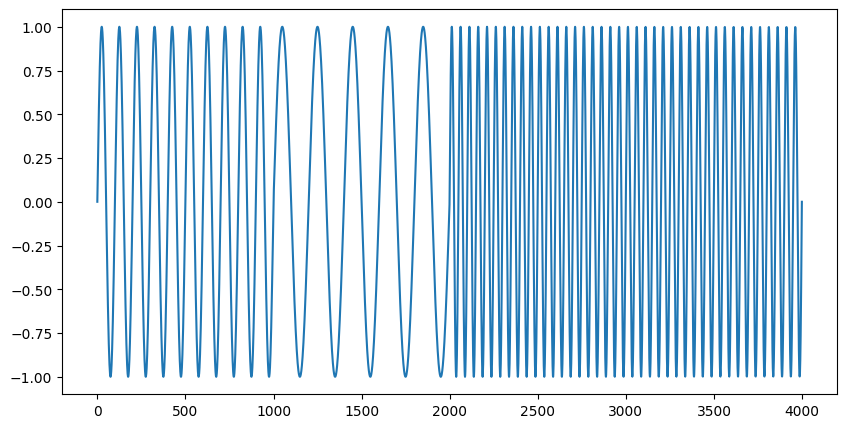

In [28]:
pd.Series(arr).plot(figsize=(10, 5))